#OBJECTIVE
The goal of this analysis is to explore how COVID-19 spread in Egypt over time using public data.
We focused on:

- Tracking daily and total COVID-19 cases.

- Analyzing monthly death trends.

- Calculating the death rate (deaths as a percentage of cases).

- Using 3-month averages to highlight long-term trends.

- Comparing the situation in Egypt and China.

- Creating clear visualizations to make the data easy to understand

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [ ]:
data = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"
df = pd.read_csv(data)

In [ ]:
df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN


In [ ]:
df = df.fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505211 entries, 0 to 505210
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     505211 non-null  object 
 1   date                                        505211 non-null  object 
 2   total_cases                                 505211 non-null  float64
 3   new_cases                                   505211 non-null  float64
 4   new_cases_smoothed                          505211 non-null  float64
 5   total_cases_per_million                     505211 non-null  float64
 6   new_cases_per_million                       505211 non-null  float64
 7   new_cases_smoothed_per_million              505211 non-null  float64
 8   total_deaths                                505211 non-null  float64
 9   new_deaths                                  505211 non-null  float64
 

In [ ]:
df.isna().sum()

,0
country,0
date,0
total_cases,0
new_cases,0
new_cases_smoothed,0
...,...
extreme_poverty,0
diabetes_prevalence,0
handwashing_facilities,0
hospital_beds_per_thousand,0


In [ ]:
df.columns

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

In [ ]:
df.shape

(505211, 61)

In [ ]:
egypt_df = df[df["country"] == "Egypt"].copy()


In [ ]:
egypt_df["date"] = pd.to_datetime(egypt_df["date"])


In [ ]:
egypt_df = egypt_df.sort_values("date")

In [ ]:
egypt_df.head()


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
125891,Egypt,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,112618191.0,113.132942,23.813,0.0,12780.759766,1.467015,20.9,89.830933,1.43,0.0
125892,Egypt,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,112618191.0,113.132942,23.813,0.0,12780.759766,1.467015,20.9,89.830933,1.43,0.0
125893,Egypt,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,112618191.0,113.132942,23.813,0.0,12780.759766,1.467015,20.9,89.830933,1.43,0.0
125894,Egypt,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,112618191.0,113.132942,23.813,0.0,12780.759766,1.467015,20.9,89.830933,1.43,0.0
125895,Egypt,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,112618191.0,113.132942,23.813,0.0,12780.759766,1.467015,20.9,89.830933,1.43,0.0


In [ ]:
egypt_df["new_deaths"].describe()


,new_deaths
count,1980.000000
mean,12.540404
std,20.608036
min,0.000000
25%,0.000000
50%,0.000000
75%,19.000000
max,97.000000


In [ ]:
egypt_df["new_cases"].describe()

,new_cases
count,1980.000000
mean,260.617677
std,485.658825
min,0.000000
25%,0.000000
50%,0.000000
75%,357.250000
max,5516.000000


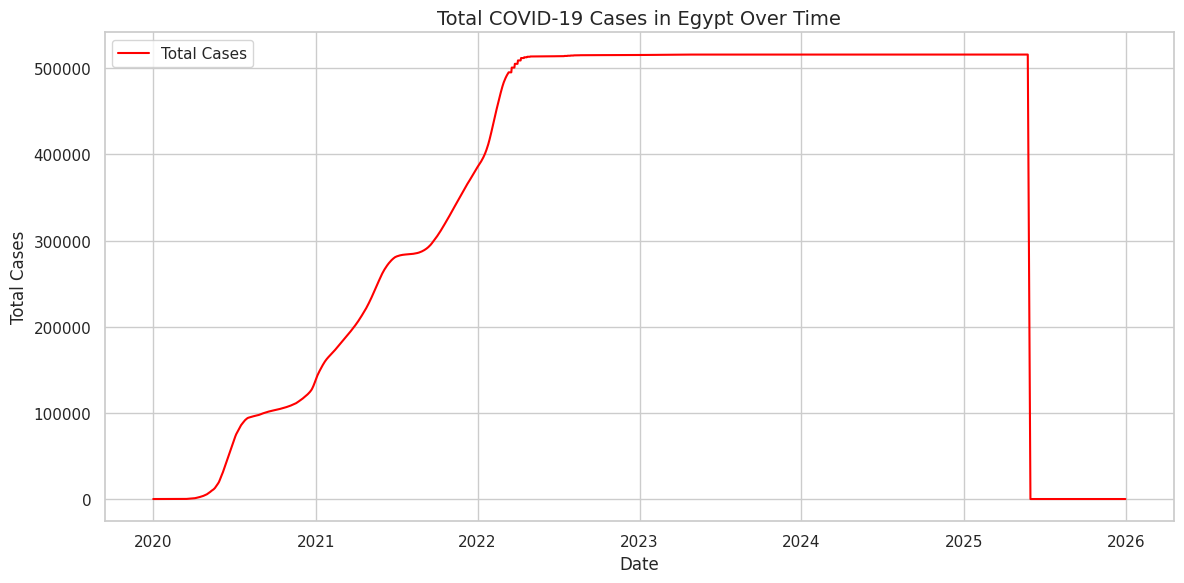

In [ ]:
plt.plot(egypt_df["date"], egypt_df["total_cases"], color='red', label="Total Cases")
plt.title("Total COVID-19 Cases in Egypt Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


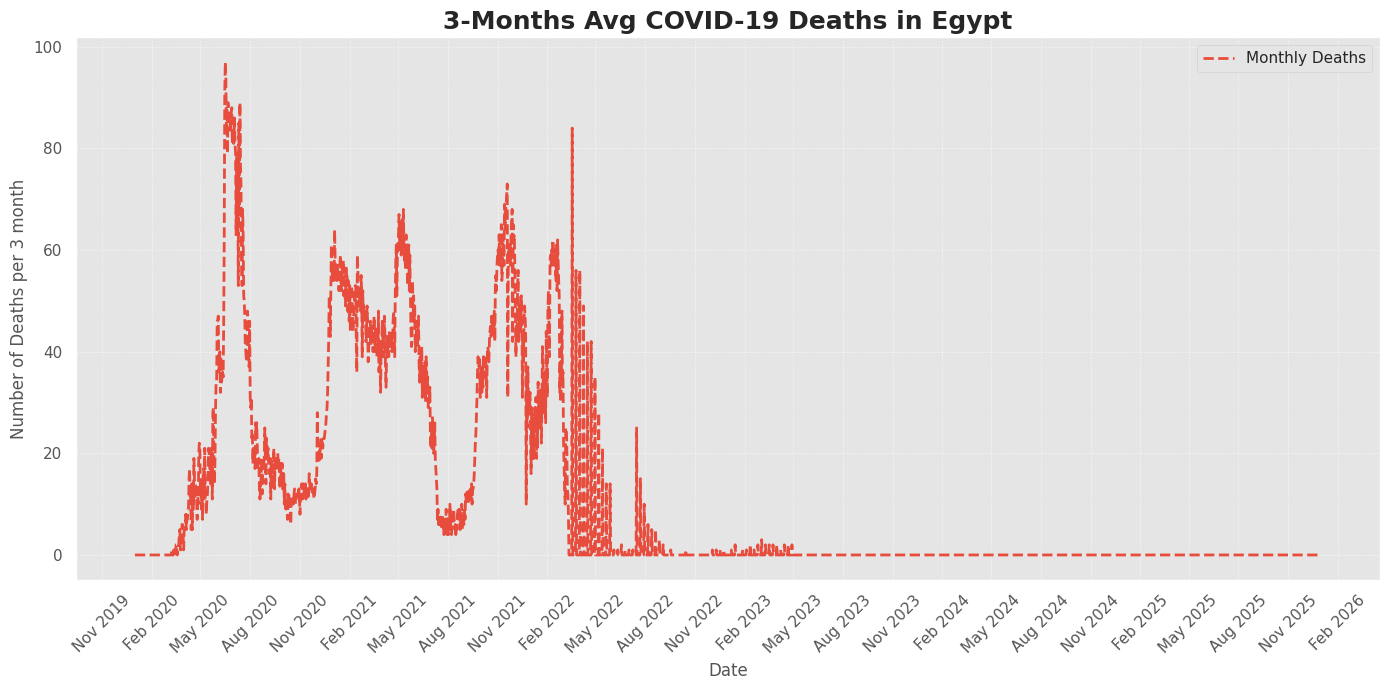

In [ ]:
plt.style.use("ggplot")

plt.figure(figsize=(14,7))
plt.plot(
    egypt_df["date"],
    egypt_df["new_deaths"],
    color="#e74c3c",
    linewidth=2,
    linestyle="--",

    label="Monthly Deaths"
)

plt.title("3-Months Avg COVID-19 Deaths in Egypt", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Deaths per 3 month", fontsize=12)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


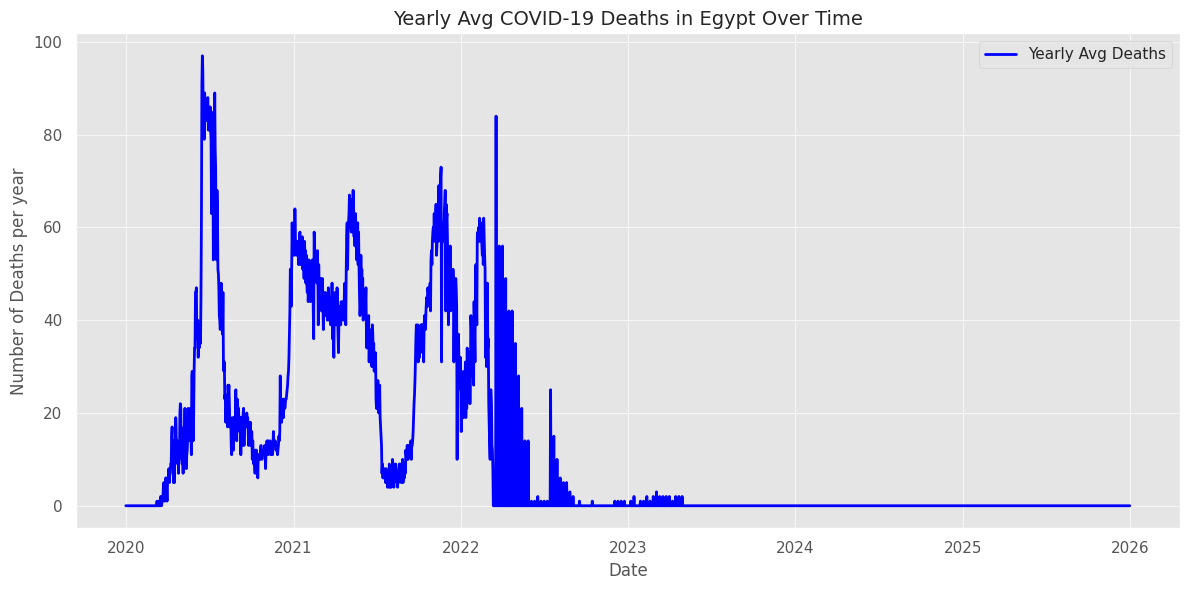

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(egypt_df["date"], egypt_df["new_deaths"], color='blue', label="Yearly Avg Deaths")

plt.title("Yearly Avg COVID-19 Deaths in Egypt Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Deaths per year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
egypt_df["new_deaths_smooth"] = egypt_df["new_deaths"].rolling(window=90).mean()


In [ ]:
egypt_df["month"] = egypt_df["date"].dt.to_period("M")
monthly_deaths = egypt_df.groupby("month")["new_deaths"].sum().sort_values(ascending=False)
monthly_deaths.head(1)

,new_deaths
month,
2020-06,1959.0


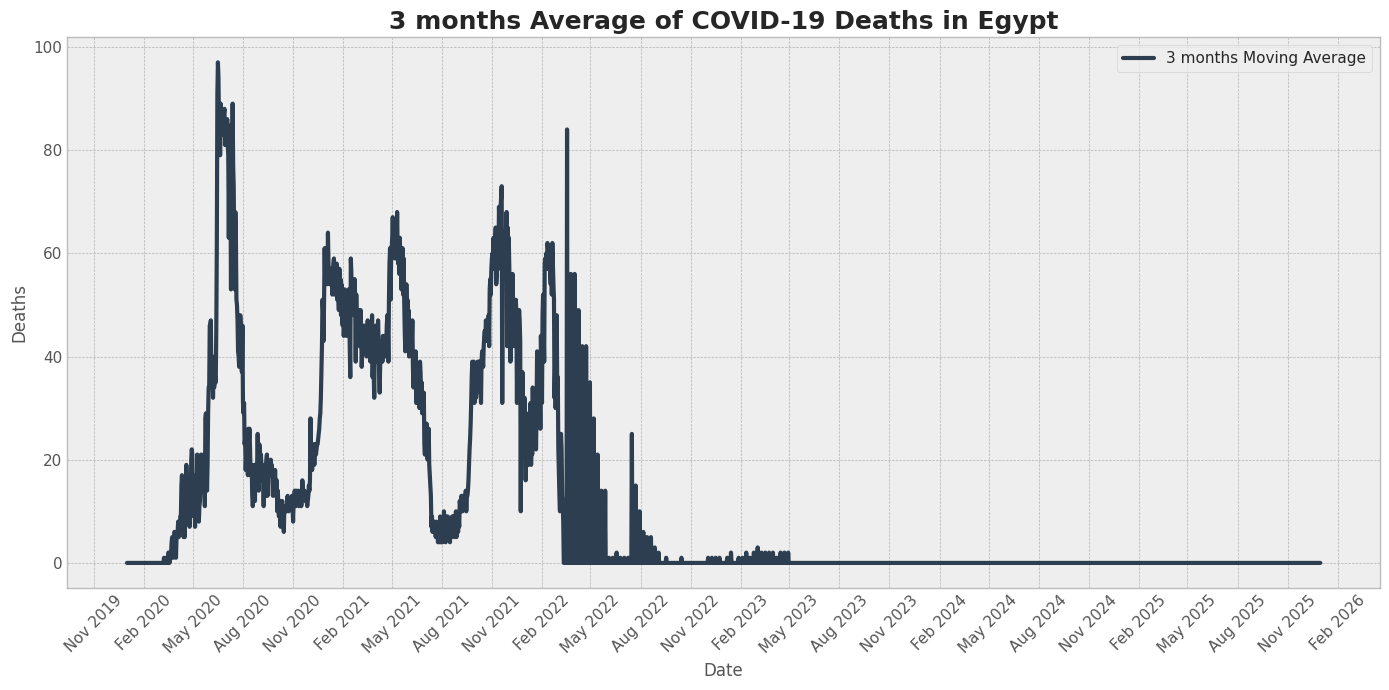

In [ ]:
plt.style.use("bmh")

plt.figure(figsize=(14,7))
plt.plot(
    egypt_df["date"],
    egypt_df["new_deaths"],
    color='#2c3e50',
    linewidth=3,
    label="3 months Moving Average"
)

plt.title("3 months Average of COVID-19 Deaths in Egypt", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Deaths", fontsize=12)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

#
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


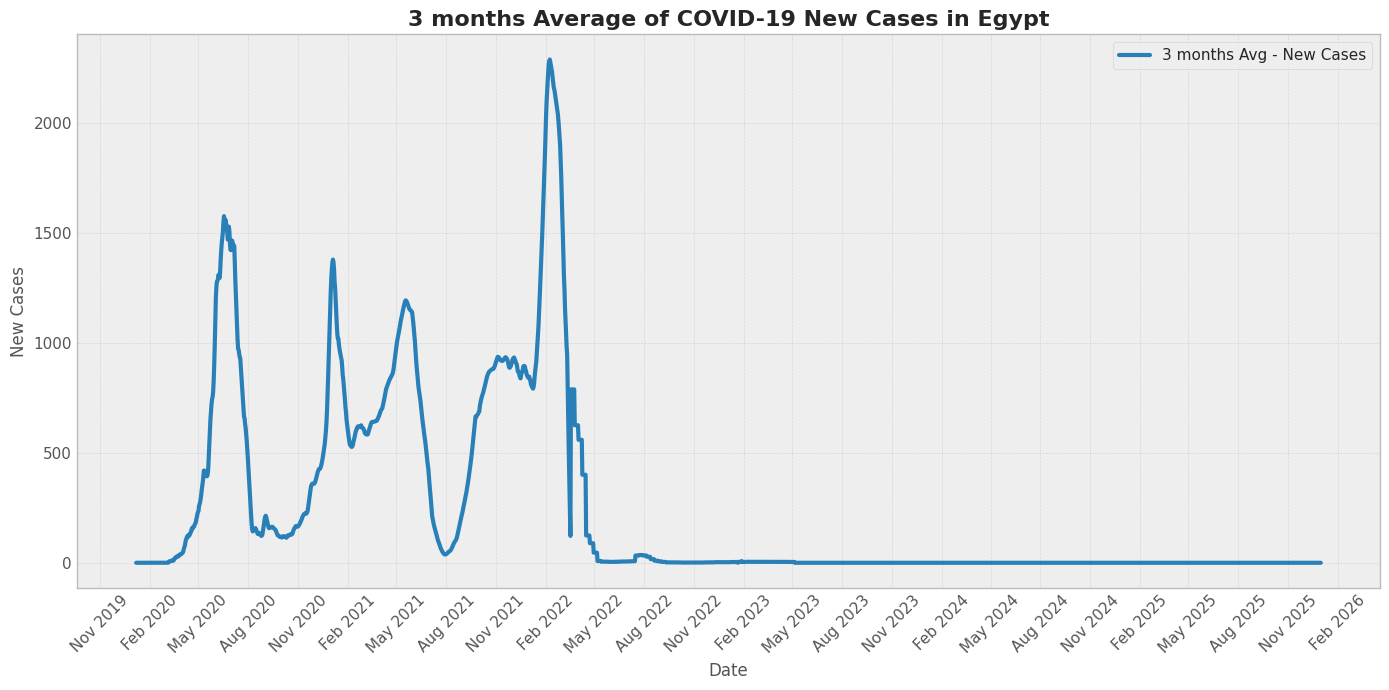

In [ ]:
plt.style.use("bmh")

plt.figure(figsize=(14,7))
plt.plot(
    egypt_df["date"],
    egypt_df["new_cases_smoothed_per_million"],
    color='#2980b9',
    linewidth=3,
    label="3 months Avg - New Cases"
)

plt.title("3 months Average of COVID-19 New Cases in Egypt", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("New Cases", fontsize=12)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
egypt_df["new_cases_smoothed_per_million"] = egypt_df["new_cases"].rolling(window=7).mean()
egypt_df["new_deaths_smooth"] = egypt_df["new_deaths"].rolling(window=7).mean()


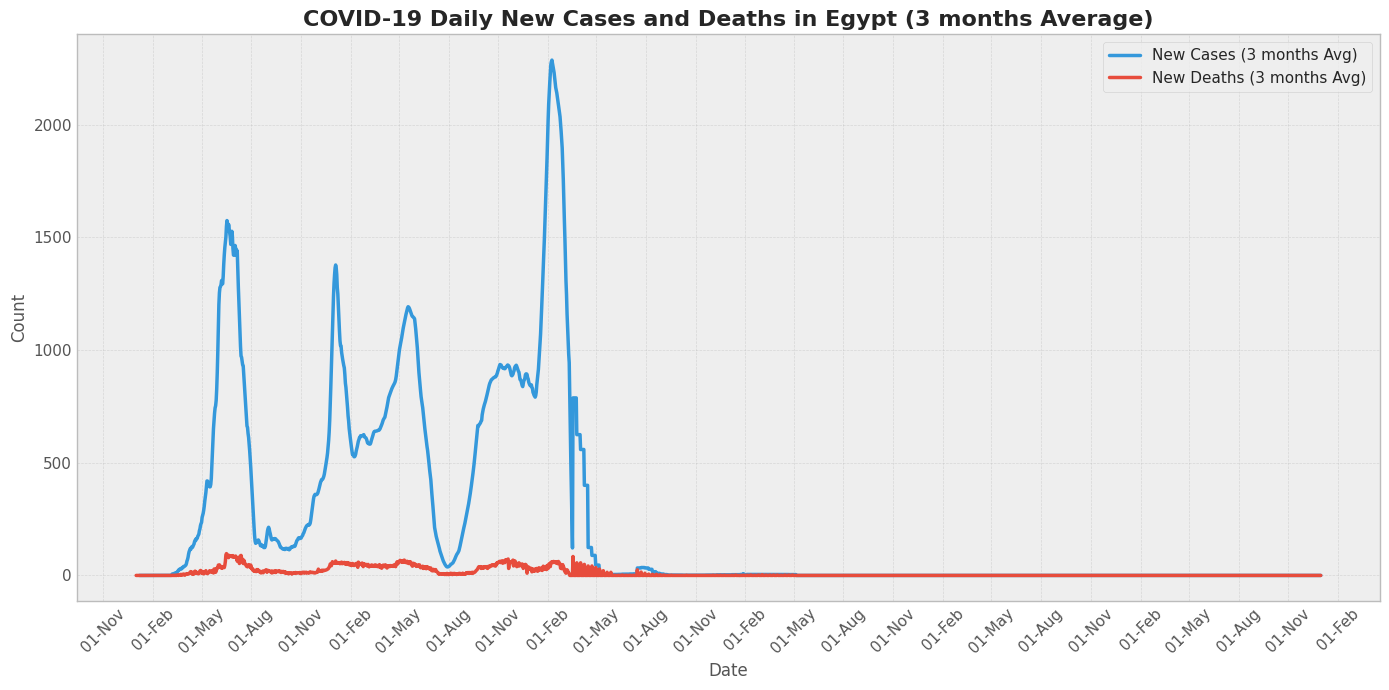

In [ ]:
plt.style.use("bmh")
plt.figure(figsize=(14,7))

plt.plot(
    egypt_df["date"],
    egypt_df["new_cases_smoothed_per_million"],
    color='#3498db',
    linewidth=2.5,
    label="New Cases (3 months Avg)"
)

plt.plot(
    egypt_df["date"],
    egypt_df["new_deaths"],
    color='#e74c3c',
    linewidth=2.5,
    label="New Deaths (3 months Avg)"
)


plt.title("COVID-19 Daily New Cases and Deaths in Egypt (3 months Average)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
egypt_df["death_rate_smooth"] = (egypt_df["new_deaths"] / egypt_df["new_cases"]) * 100


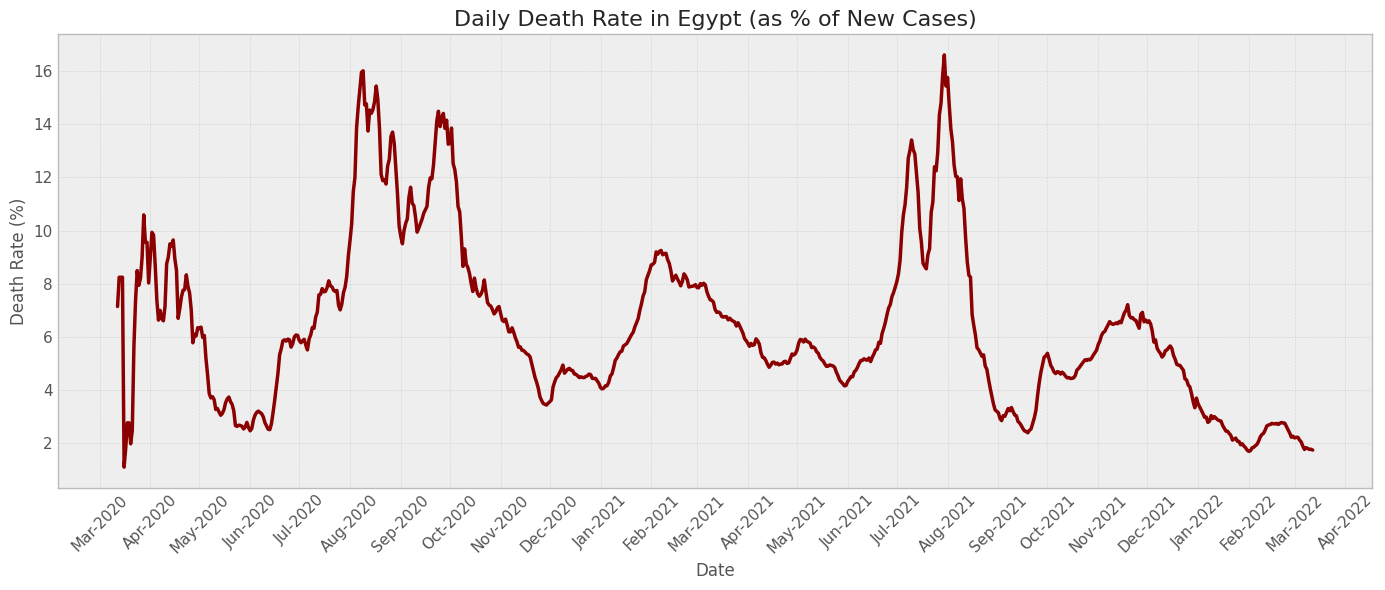

In [ ]:
egypt_df["death_rate_smooth"] = egypt_df["death_rate_smooth"].rolling(window=7).mean()

plt.figure(figsize=(14,6))
plt.plot(egypt_df["date"], egypt_df["death_rate_smooth"], color='darkred', linewidth=2.5)

plt.title("Daily Death Rate in Egypt (as % of New Cases)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate (%)")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
latest_deaths = (
    df.sort_values('date')
      .groupby('country')['total_deaths']
      .last()
      .sort_values(ascending=False)
)

print(latest_deaths.head())


country
World                                                  7095802.0
World excl. China                                      6973404.0
World excl. China and South Korea                      6937470.0
World excl. China, South Korea, Japan and Singapore    6860752.0
High-income countries                                  3034138.0
Name: total_deaths, dtype: float64


In [ ]:
egypt_df = df[df["country"] == "Egypt"].copy()
china_df = df[df["country"] == "China"].copy()

egypt_df["date"] = pd.to_datetime(egypt_df["date"])
china_df["date"] = pd.to_datetime(china_df["date"])

egypt_df["new_cases_smoothed_per_million"] = egypt_df["new_cases"].rolling(window=7).mean()
china_df["new_cases_smoothed_per_million"] = china_df["new_cases"].rolling(window=7).mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=egypt_df["date"],
    y=egypt_df["new_cases_smoothed_per_million"],
    mode='lines',
    name='Egypt',
    line=dict(color='blue'),
    hovertemplate='Date: %{x}<br>New Cases: %{y:.0f}<extra>Egypt</extra>'
))

fig.add_trace(go.Scatter(
    x=china_df["date"],
    y=china_df["new_cases_smoothed_per_million"],
    mode='lines',
    name='China',
    line=dict(color='red'),
    hovertemplate='Date: %{x}<br>New Cases: %{y:.0f}<extra>China</extra>'
))

fig.update_layout(
    title='Daily New COVID-19 Cases (7-Day Avg) — Egypt vs China',
    xaxis_title='Date',
    yaxis_title='New Cases',
    hovermode='x unified',
    template='plotly_white',
    height=500
)

fig.show()


#Insights:
Some months had much higher deaths
→ This shows there were strong waves of COVID-19 in Egypt.

More cases didn’t always mean more deaths
→ Death rate changed over time. It may be due to better healthcare or virus changes.

Overall trend shows a slow decrease
→ 3-month averages show that cases and deaths dropped with time.

Egypt had more ups and downs than China
→ China controlled the spread faster and more steadily.



#Recommendations:
Look deeper into peak months
→ Study what happened (lockdowns, events) during high-death months.

Use early warning systems
→ Track daily trends to act early before things get worse.

Use average trends, not daily numbers
→ Averages (like 7 or 90-day) give a clearer view of what’s really happening.

Compare Egypt with similar countries too
→ Not just China, compare with countries like Morocco or Tunisia to learn more.

